In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.impute import KNNImputer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Reading data

In [2]:
train = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sirota, Mr. Maurice",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Cleaning Data

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train['Age']=np.round(train['Age'])
train = train.drop(columns=['Cabin','Ticket', 'Name'])
test_data = test_data.drop(columns=['Cabin','Ticket', 'Name'])

In [7]:
label_encoder = LabelEncoder()

train["Sex"] = label_encoder.fit_transform(train["Sex"])
train["Embarked"] = label_encoder.fit_transform(train["Embarked"])

train[train['Embarked']==3]=2


test_data["Sex"] = label_encoder.fit_transform(test_data["Sex"])
test_data["Embarked"] = label_encoder.fit_transform(test_data["Embarked"])


train['Embarked'].value_counts()
train['Sex'].value_counts()

1    577
0    312
2      2
Name: Sex, dtype: int64

## Imputer Method

In [8]:
imputer = KNNImputer(n_neighbors=5) 
df = imputer.fit_transform(train)
train = pd.DataFrame(df, columns = train.columns)

for col in train.columns:
    train[col] = pd.to_numeric(train[col]).astype(int)


imputer1 = KNNImputer(n_neighbors=5) 
df1 = imputer1.fit_transform(test_data)
test_data = pd.DataFrame(df1, columns = test_data.columns)

for col in test_data.columns:
    test_data[col] = pd.to_numeric(test_data[col]).astype(int)
    

In [9]:
train = train.sort_values(by="Age")
train.iloc[:118,4] = 0
train.iloc[118:678,4] = 1
train.iloc[678:,4] = 2
train["Age"].value_counts()

1    560
2    213
0    118
Name: Age, dtype: int64

# Model (RandomForest)

In [36]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp","Embarked","Fare"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

predictions=np.array(predictions,int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# Model (Decision Tree)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


y = train["Survived"]

features = ["Pclass", "Sex", "Fare", "Parch", 'Age']
X = train[features]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


## Model (KNN)

In [13]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "Fare", "Parch", 'Age']
X = train[features]
X_test = test_data[features]



# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the training data
model = knn.fit(X, y)
predictions = model.predict(X_test)


#X, y = make_classification(n_features=4, random_state=0)
#clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5)
#model = clf.fit(X, y)
#train_accuracy = clf.score(X_train, y_train)
#test_accuracy = clf.score(X_test, y_test)


predictions=np.array(predictions,int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


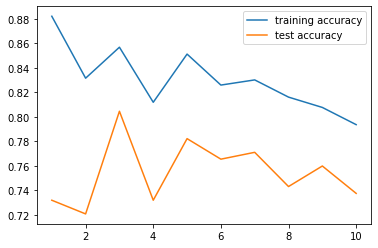

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

training_accuracy = []
test_accuracy = []

neigbors_settings = range(1,11)

for n_neigbors in neigbors_settings:
    
    knn = KNeighborsClassifier(n_neighbors=n_neigbors)
    knn.fit(X_train,y_train)
    
    training_accuracy.append(knn.score(X_train,y_train))
    
    test_accuracy.append(knn.score(X_test,y_test))
    
plt.plot(neigbors_settings,training_accuracy,label="training accuracy")
plt.plot(neigbors_settings,test_accuracy,label="test accuracy")
    
plt.legend()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)